# 1.kNN clustering on Retail data for customer segmentation
![Binary classification](ressources/customers.jpeg)


## About the dataset:
Online retail is a transactional data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail. The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## Business Goal
We aim to segement the Customers based on k-means so that the company can target its customers efficiently.

## Your tasks:
## Please implement it in the following oder:


1. Load and explore the dataset: 
    - Count number of purchases by customer ID
    - Plot 10 most-purchasing customers(barplot)
    
    
2. Split data into train- and testset(80%/20% ratio)


3. EDA - Feature Engineering:
    - Use data to build the following new features which we will use for clustering: 
        1. Monetary: Total amount(revenue contributed) of transactions: 
                -userpurchases(amount) * unit price
        2. Frequency: Number of transactions
                - count number of user purchases
    - NOTE: At the end of above step you should have a table, where each row represents a user ID, with the 2 specified features from above
    - Mean-center and standardize the data
        - check out: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
    - Plot the data
    ## OUTLIERS!
    - Remove outliers with the given function
    - Plot the cleaned data
    
    
4. Apply kNN on the dataset:
    - Cluster the training data
    - Scatterplot the data and color each point depending on its cluster
    - Try to use different numbers of clusters centres k

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [3]:
data = pd.read_csv('data/OnlineRetail.csv', encoding='latin')
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [4]:
# remove Quantity lower than 0
data = data.dropna()
retail_df = data[data["Quantity"] > 0]
retail_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09-12-2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09-12-2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09-12-2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09-12-2011 12:50,4.15,12680.0,France


In [5]:
# Changing the datatype of Customer Id as per Business understanding
retail_df['CustomerID'] = retail_df['CustomerID'].astype(str)
retail_df

D:\software\anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09-12-2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09-12-2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09-12-2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09-12-2011 12:50,4.15,12680.0,France


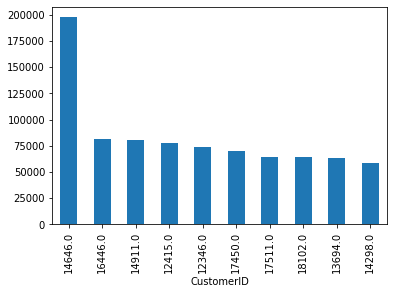

In [6]:
# Load and explore the dataset:
purchase_num = retail_df.groupby(["CustomerID"]).count().iloc[:,0]
purchase_plot = retail_df.groupby(["CustomerID"]).sum().sort_values(by="Quantity",ascending=False).head(10)["Quantity"]
purchase_plot.plot.bar()

In [7]:
# Split data into train- and testset(80%/20% ratio)
from sklearn.model_selection import train_test_split
data_train, data_test = train_test_split(retail_df, test_size=0.2)

In [8]:
data_train

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
260404,559810,22668,PINK BABY BUNTING,10,12-07-2011 15:15,2.95,16168.0,United Kingdom
446934,574938,22622,BOX OF VINTAGE ALPHABET BLOCKS,2,07-11-2011 17:15,11.95,14911.0,EIRE
459253,575871,22195,LARGE HEART MEASURING SPOONS,12,11-11-2011 12:52,1.65,14911.0,EIRE
429891,573576,23084,RABBIT NIGHT LIGHT,8,31-10-2011 14:09,4.13,14096.0,United Kingdom
475586,576905,23424,GINGHAM RECIPE BOOK BOX,4,17-11-2011 09:31,4.95,13308.0,United Kingdom
...,...,...,...,...,...,...,...,...
67607,541841,22963,JAM JAR WITH GREEN LID,6,23-01-2011 11:53,0.85,14450.0,United Kingdom
234579,557570,23283,DOORMAT VINTAGE LEAVES DESIGN,1,21-06-2011 10:48,7.95,15998.0,United Kingdom
310704,564198,10133,COLOURING PENCILS BROWN TUBE,5,23-08-2011 17:18,0.42,14418.0,United Kingdom
299145,563091,22429,ENAMEL MEASURING JUG CREAM,4,11-08-2011 17:02,4.25,12994.0,United Kingdom


In [9]:
# EDA - Feature Engineering

# Monetary feature and # Frequency feature
data_train["Monetary"] = data_train["Quantity"] * data_train["UnitPrice"]
freq = data_train.groupby("CustomerID").count()["Monetary"]
monetary = data_train.groupby("CustomerID").sum()["Monetary"]
data_train_new = pd.concat([freq, monetary], axis=1)
data_train_new.columns=['Frequency', 'Monetary']
data_train_new

D:\software\anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Frequency,Monetary
CustomerID,,
12346.0,1,77183.60
12347.0,142,3389.35
12348.0,22,1404.48
12349.0,62,1564.04
12350.0,14,271.70
...,...,...
18280.0,8,147.90
18281.0,4,42.33
18282.0,11,152.55


In [10]:
# Rescale the attributes
# Mean-center and standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data_train_new)
mean = scaler.mean_
standard = scaler.transform(data_train_new)
mean, standard

(array([  73.70664506, 1659.01380042]),
 array([[-3.96587117e-01,  1.03202569e+01],
        [ 3.72514297e-01,  2.36446368e-01],
        [-2.82040098e-01, -3.47814446e-02],
        ...,
        [-3.42040918e-01, -2.05854732e-01],
        [ 2.83254790e+00, -2.20191289e-03],
        [-1.23856119e-01, -4.98755435e-02]]))

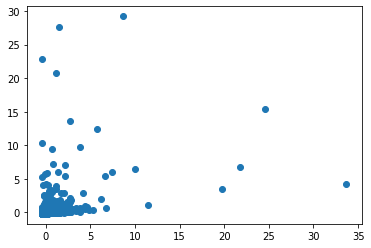

In [11]:
# Plot the data and observe outliers
plt.scatter(standard[:,0],standard[:,1])

#### ----------------------------------------------------------Solution--------------------------------------------------####

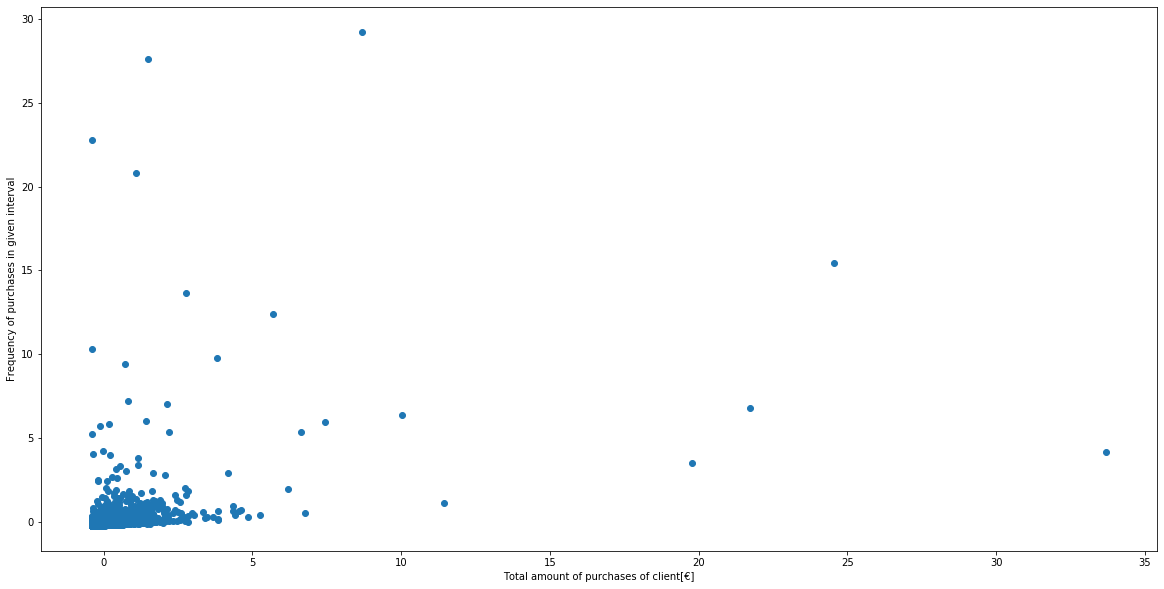

In [12]:
fig = plt.figure(figsize=(20,10))
plt.scatter(standard[:,0], standard[:,1])
plt.xlabel('Total amount of purchases of client[€]')
plt.ylabel('Frequency of purchases in given interval')
plt.show()

In [13]:
### USE THIS FUNCTION TO REMOVE OUTLIERS AFTER STANDARDIZING THE DATA
from scipy import stats

final_data = standard

def remove_outliers(df, thresh):
    z_scores = np.abs(stats.zscore(df))
    df = df[(z_scores < thresh).all(axis=1)]
    
    return df
    
clean_df = remove_outliers(final_data, 3)

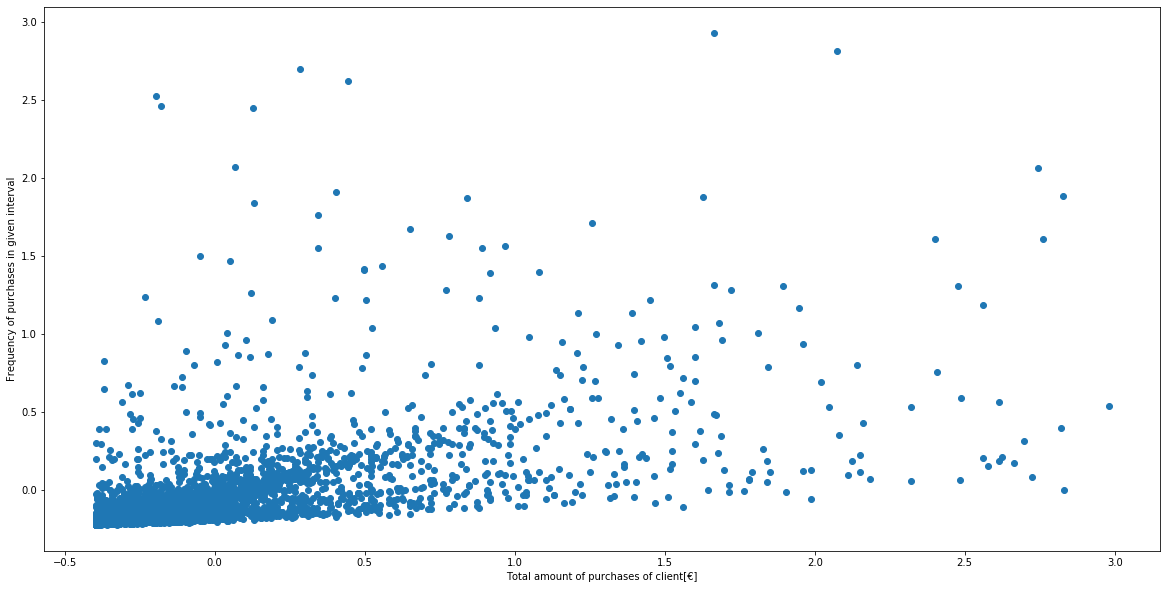

In [14]:
# Plot the data again and see that it looks much better now
fig = plt.figure(figsize=(20,10))
plt.scatter(clean_df[:,0], clean_df[:,1])
plt.xlabel('Total amount of purchases of client[€]')
plt.ylabel('Frequency of purchases in given interval')
plt.show()

In [19]:
# Apply KMEANS

model = KMeans(n_clusters=5, max_iter = 10)
model.fit(clean_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=10,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

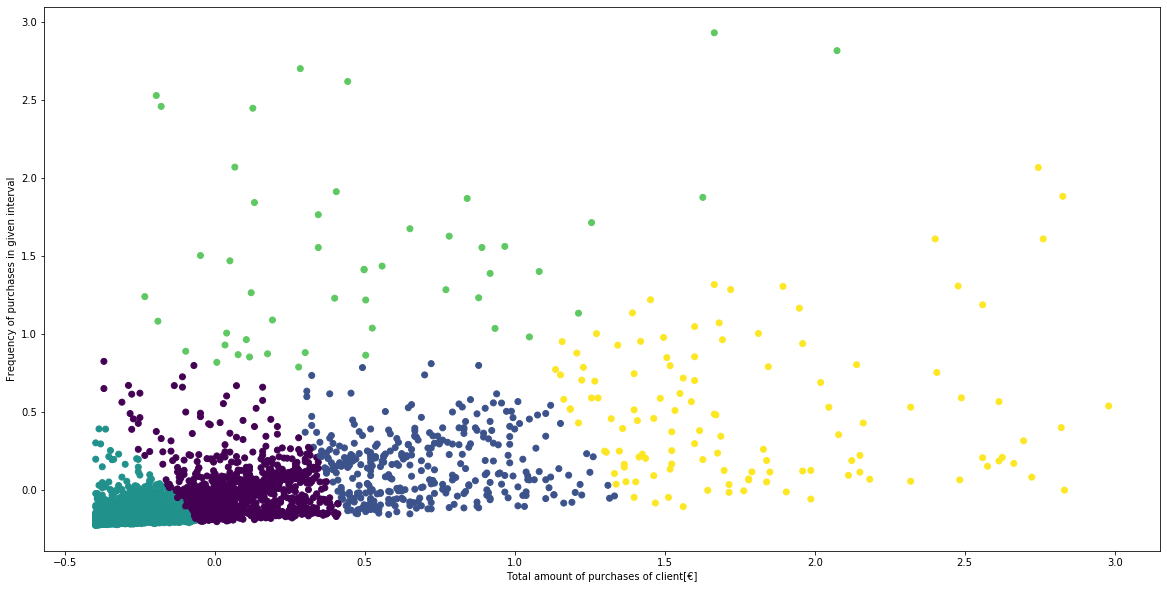

In [20]:
# Plot the clustered data

fig = plt.figure(figsize=(20,10))
plt.scatter(clean_df[:,0], clean_df[:, 1], c=model.labels_)
plt.xlabel('Total amount of purchases of client[€]')
plt.ylabel('Frequency of purchases in given interval')

plt.show()

# Q2.: Dimensionality Reduction

# OPTIONAL TASK:
### Do:
    - create your own 3 features of choice out of original data
    - apply PCA on it, and extract the first 2 components
    - plot the data projected onto these two components
    - apply kmeans, does it work better than the former method 